In [ ]:
########################
#errors in the QFT only considering
#the zero state as initial state
#######################

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
from qiskit import execute, transpile, assemble
from qiskit import Aer
from numpy import pi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
print("Import Successfully")

Import Successfully


In [3]:
# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer import AerSimulator
print("Import Successfully")

Import Successfully


In [4]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    
    #if (random.randint(0,1) == 0):
    
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    epsilon = 1                    
    extracted = random.uniform(0, 1)
    if (extracted < epsilon):
        circuit.x(0) 
    qft_rotations(circuit, n)
    qc_noisy.save_density_matrix()
    swap_registers(circuit, n)
    return circuit

qubits = 4    #sistem-dimension
qc_noisy = QuantumCircuit(qubits)
qc_noisy.initialize(0,)
#for i in range(qubits):
#    qc_noisy.h(i)
qft(qc_noisy,qubits)


qc_noisy.measure_all()

qc_noisy.draw(fold = -1)


┌────────────────┐┌───┐                                                                ┌───┐ density_matrix        ░ ┌─┐         
   q_0: ┤0               ├┤ X ├─■───────────────────────────────■──────────────────────■───────┤ H ├───────░─────────X─────░─┤M├─────────
        │                │└───┘ │                               │                ┌───┐ │P(π/2) └───┘       ░         │     ░ └╥┘┌─┐      
   q_1: ┤1               ├──────┼────────■──────────────────────┼────────■───────┤ H ├─■───────────────────░─────────┼──X──░──╫─┤M├──────
        │  Initialize(0) │      │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘                     ░         │  │  ░  ║ └╥┘┌─┐   
   q_2: ┤2               ├──────┼────────┼────────■───────┤ H ├─■────────■─────────────────────────────────░─────────┼──X──░──╫──╫─┤M├───
        │                │┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                            ░         │     ░  ║  ║ └╥┘┌─┐
   q_3: ┤3               ├┤ H ├─■────────■────────■────────────────────────────────────────────────────────░─────────X─────░──╫──╫──╫─┤M├
        └────────────────┘└───┘                                                                            ░               ░  ║  ║  ║ └╥┘
meas_0: ══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╬══╬══╬═
                                                                                                                                 ║  ║  ║ 
meas_1: ═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╬══╬═
                                                                                                                                    ║  ║ 
meas_2: ════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╬═
                                                                                                                                       ║ 
meas_3: ═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩═

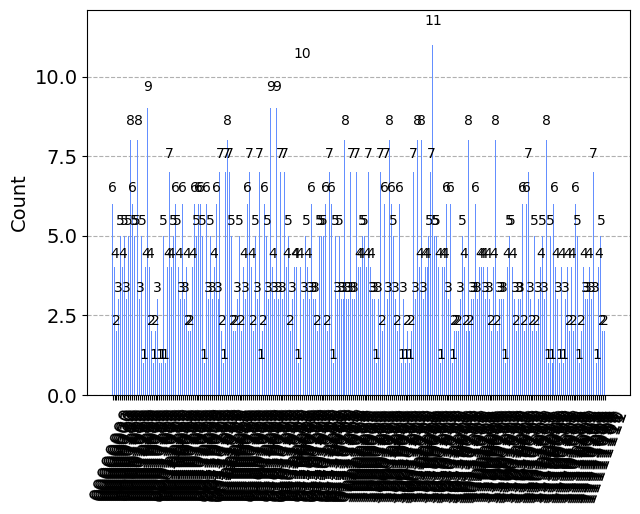

In [76]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc_noisy, aer_sim)
qobj = assemble(t_qc)                                
results = aer_sim.run(qobj, shots = 1024).result()

density_matrix = results.data().get('density_matrix')
density_matrix = np.asarray(density_matrix)

#print('det = ', np.linalg.det(density_matrix))
#print(density_matrix)

#print('\n'.join([''.join([' {0.real:.2f} '.format(item) for item in row]) 
#      for row in density_matrix]))

counts = results.get_counts()
plot_histogram(counts)    

In [44]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qubits = 8    #sistem-dimension
qc_ideal = QuantumCircuit(qubits)

#for i in range(qubits):
#    qc_ideal.h(i)
    
qft(qc_ideal,qubits)
qc_ideal.save_density_matrix()
qc_ideal.measure_all()

qc_ideal.draw(fold = -1)

┌───┐    density_matrix  ░ ┌─┐                     
   q_0: ──────■────────────────────────────────────────────────────────────────────────■─────────────────────────────────────────────────────────────■───────────────────────────────────────────────────■─────────────────────────────────────────■───────────────────────────────■──────────────────────■───────┤ H ├─X────────░─────────░─┤M├─────────────────────
              │                                                                        │                                                             │                                                   │                                         │                               │                ┌───┐ │P(π/2) └───┘ │        ░         ░ └╥┘┌─┐                  
   q_1: ──────┼──────────■─────────────────────────────────────────────────────────────┼─────────■───────────────────────────────────────────────────┼─────────■─────────────────────────────────────────┼─────────■───────────────────────────────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X───┼────────░─────────░──╫─┤M├──────────────────
              │          │                                                             │         │                                                   │         │                                         │         │                               │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘           │   │        ░         ░  ║ └╥┘┌─┐               
   q_2: ──────┼──────────┼─────────■───────────────────────────────────────────────────┼─────────┼─────────■─────────────────────────────────────────┼─────────┼─────────■───────────────────────────────┼─────────┼────────■──────────────────────┼────────┼────────■───────┤ H ├─■────────■─────────X─────────────┼───┼────────░─────────░──╫──╫─┤M├───────────────
              │          │         │                                                   │         │         │                                         │         │         │                               │         │        │                ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                    │             │   │        ░         ░  ║  ║ └╥┘┌─┐            
   q_3: ──────┼──────────┼─────────┼─────────■─────────────────────────────────────────┼─────────┼─────────┼─────────■───────────────────────────────┼─────────┼─────────┼────────■──────────────────────┼─────────┼────────┼────────■───────┤ H ├─■────────■────────■─────────X──────────────────────┼─────────────┼───┼────────░─────────░──╫──╫──╫─┤M├────────────
              │          │         │         │                                         │         │         │         │                               │         │         │        │                ┌───┐ │P(π/16)  │P(π/8)  │P(π/4)  │P(π/2) └───┘                             │                      │             │   │        ░         ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────┼──────────┼─────────┼─────────┼─────────■───────────────────────────────┼─────────┼─────────┼─────────┼────────■──────────────────────┼─────────┼─────────┼────────┼────────■───────┤ H ├─■─────────■────────■────────■─────────────────────────────────────────X──────────────────────┼─────────────┼───┼────────░─────────░──╫──╫──╫──╫─┤M├─────────
              │          │         │         │         │                               │         │         │         │        │                ┌───┐ │P(π/32)  │P(π/16)  │P(π/8)  │P(π/4)  │P(π/2) └───┘                                                                                              │             │   │        ░         ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────┼──────────┼─────────┼─────────┼─────────┼────────■──────────────────────┼─────────┼─────────┼─────────┼────────┼────────■───────┤ H ├─■─────────■─────────■────────■────────■──────────────────────────────────────────────────────────────────────────────────────────────────────────X─────────────┼───┼────────░─────────░──╫──╫──╫──╫──╫─┤M├──────
          

det = 0j


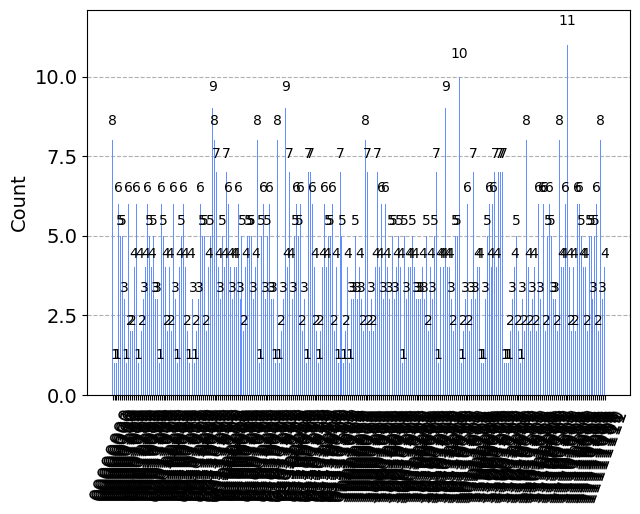

In [57]:
density_matrix_ideal = 0
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc_ideal, aer_sim)
qobj = assemble(t_qc)                                
results = aer_sim.run(qobj, shots = 1024).result()

density_matrix_ideal = results.data().get('density_matrix')
density_matrix_ideal = np.asarray(density_matrix_ideal)

print('det =', np.linalg.det(density_matrix_ideal))
#print(density_matrix_ideal)

#print('\n'.join([''.join([' {0.real:.2f}'.format(item) for item in row]) 
#      for row in density_matrix_ideal]))

counts = results.get_counts()
plot_histogram(counts)    


C:\Users\giuli\anaconda3\envs\quiskit\lib\site-packages\numpy\lib\histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\giuli\anaconda3\envs\quiskit\lib\site-packages\matplotlib\axes\_axes.py:6708: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


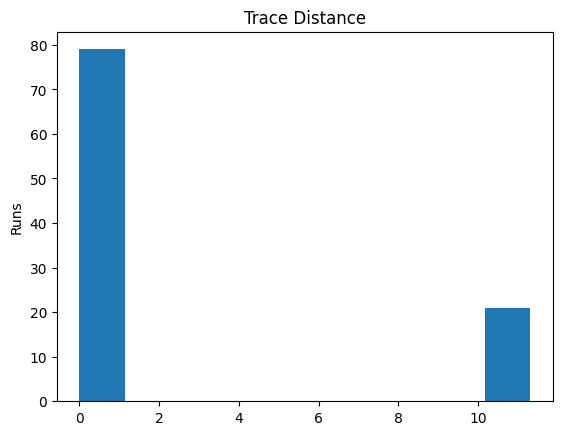

In [54]:
def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
        
    epsilon = 0.2                    
    extracted = random.uniform(0, 1)
    if (extracted < epsilon):    
        circuit.z(1)
        
    circuit.h(n)  
    
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)        
    qc_noisy.save_density_matrix()
    return circuit

distanze = []

runs = 100
for i in range(runs):
    qubits = 8                            
    qc_noisy = QuantumCircuit(qubits)
    qft(qc_noisy,qubits)
    #simulazione
    aer_sim = Aer.get_backend('aer_simulator')
    t_qc = transpile(qc_noisy, aer_sim)
    qobj = assemble(t_qc)                                
    results = aer_sim.run(qobj, shots = 1).result()
    #estrazione matrice densità
    density_matrix = results.data().get('density_matrix')
    density_matrix = np.asarray(density_matrix)
    #calcolo della distanza
    diff = density_matrix - density_matrix_ideal
    mult = np.matmul(np.transpose(diff), diff)
    rad = np.sqrt(mult)
    distanze.append(rad.trace()/2)
    
plt.title('Trace Distance')
plt.ylabel('Runs')
plt.hist(distanze)
#plt.show()
plt.savefig('distances.pdf', format = 'pdf')

C:\Users\giuli\anaconda3\envs\quiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


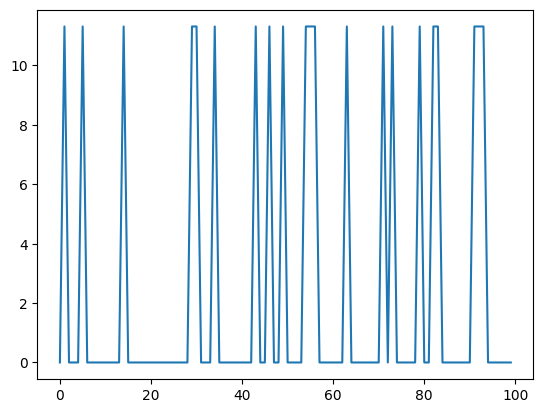

In [55]:
plt.plot(distanze)